In [1]:
# Import libraries need for Modelling
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading CSV file and converting into dataframe
dt=pd.read_csv('loan_prediction.csv')

In [3]:
# Dataset available for analysis
dt

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
print('The shape of the dataset is', dt.shape)

The shape of the dataset is (614, 13)


In [5]:
# Dataframe columns
dt.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
# To find the data type of the dataset
for col in dt:
    print ('This column', col ,'has', dt[col].unique(),'unique elements')
    print ('*'*100)

This column Loan_ID has ['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050'
 'LP001052' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087'
 'LP001091' 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106'
 'LP001109' 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120'
 'LP001123' 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144'
 'LP001146' 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179'
 'LP001186' 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199'
 'LP001205' 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225'
 'LP001228' 'LP001233' 'LP001238' 'LP001241' 'LP001243' 'LP001245'
 'LP001248' 'LP001250' 'LP001253' 'LP001255' 'LP001256' 'LP001259'
 'LP001263' 'LP001264' 'LP001265' 'LP001266' 'LP001267' 'LP001273'
 'LP001275' 'LP001279' 'LP001280' 'LP0

In [7]:
# Seeing for the null values in the dataset
dt.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

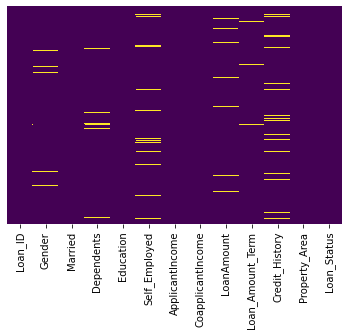

In [8]:
sns.heatmap(dt.isnull(), yticklabels = False, cbar = False, cmap ='viridis')

In [9]:
# Getting information on the dataset
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
# To find the correlection in the dataset
dt.corr().T

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


<AxesSubplot:>

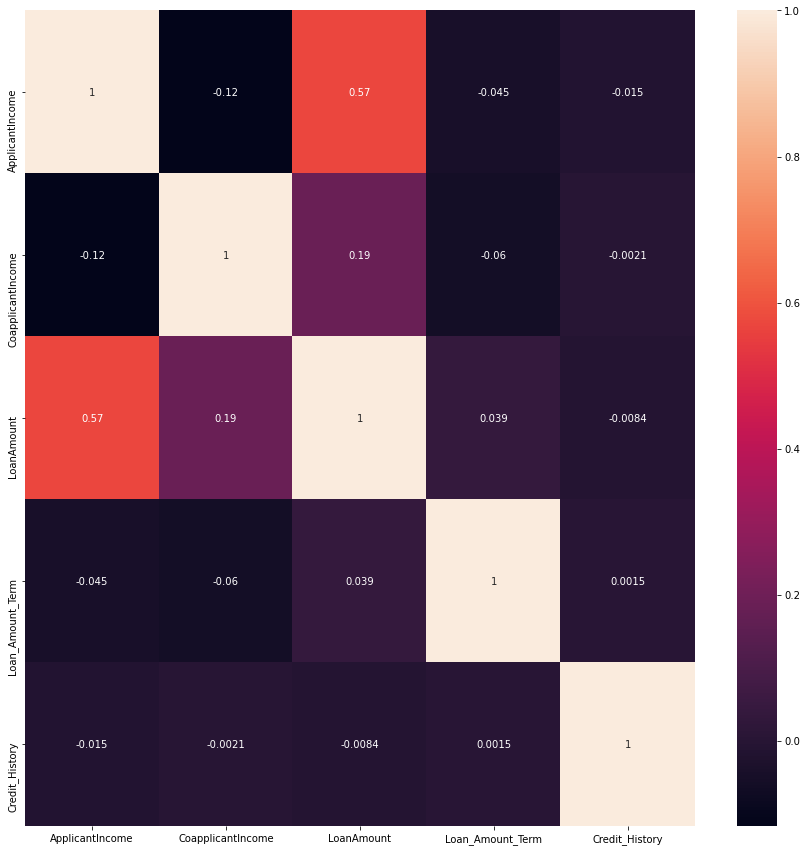

In [11]:
e=dt.corr()
# Ploting the heatmap for better understanding
plt.subplots(figsize=(15,15))
sns.heatmap(e,annot=True)

# Exploratory data Analysis

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

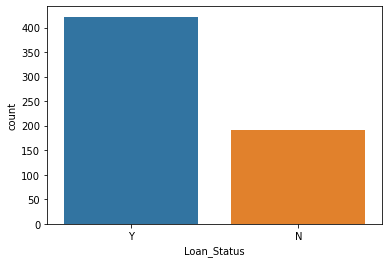

In [12]:
sns.countplot(dt['Loan_Status'])

In [13]:
dt['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

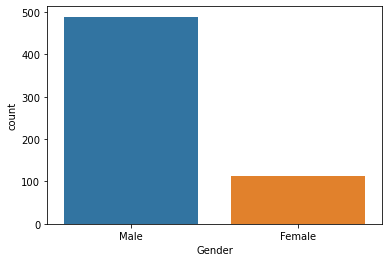

In [14]:
sns.countplot(dt['Gender'])

<AxesSubplot:xlabel='Married', ylabel='count'>

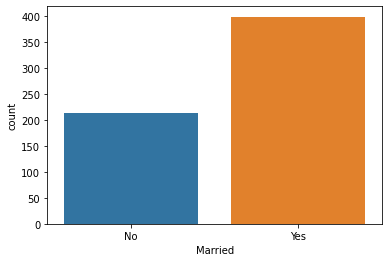

In [15]:
sns.countplot(dt['Married'])

<AxesSubplot:xlabel='Dependents', ylabel='count'>

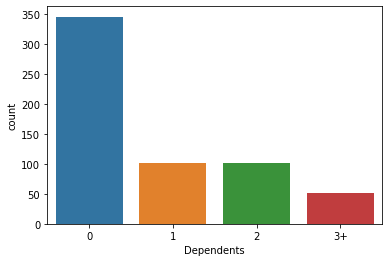

In [16]:
sns.countplot(dt['Dependents'])

<AxesSubplot:xlabel='Education', ylabel='count'>

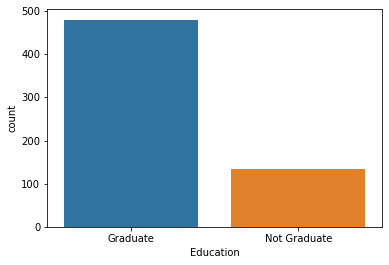

In [17]:
sns.countplot(dt['Education'])

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

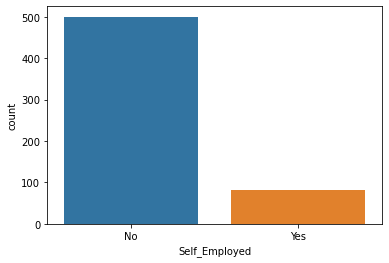

In [18]:
sns.countplot(dt['Self_Employed'])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

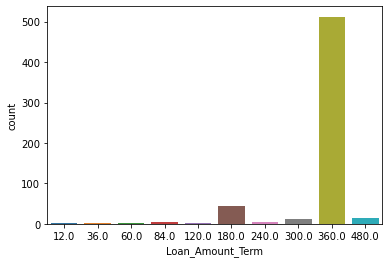

In [19]:
sns.countplot(dt['Loan_Amount_Term'])

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

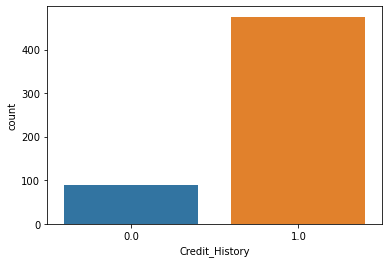

In [20]:
sns.countplot(dt['Credit_History'])

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

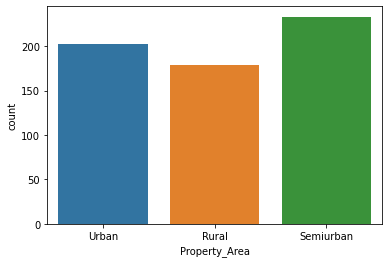

In [21]:
sns.countplot(dt['Property_Area'])

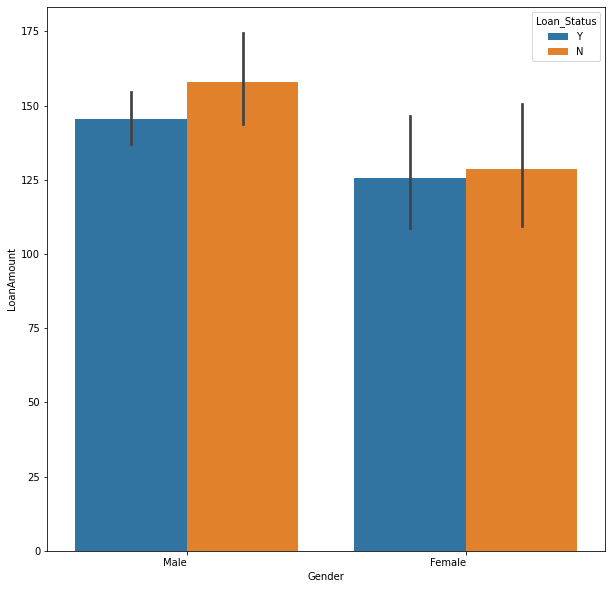

<function seaborn.categorical.countplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None, **kwargs)>

In [22]:
plt.subplots(figsize=(10,10))
chart =sns.barplot(x='Gender', y='LoanAmount', hue='Loan_Status', data=dt)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0, horizontalalignment='right')
plt.show()
sns.countplot

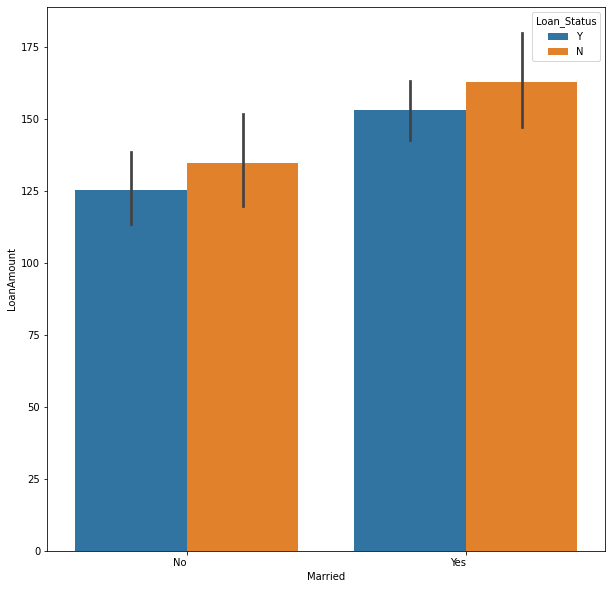

<function seaborn.categorical.countplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None, **kwargs)>

In [23]:
plt.subplots(figsize=(10,10))
chart =sns.barplot(x='Married', y='LoanAmount', hue='Loan_Status', data=dt)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0, horizontalalignment='right')
plt.show()
sns.countplot

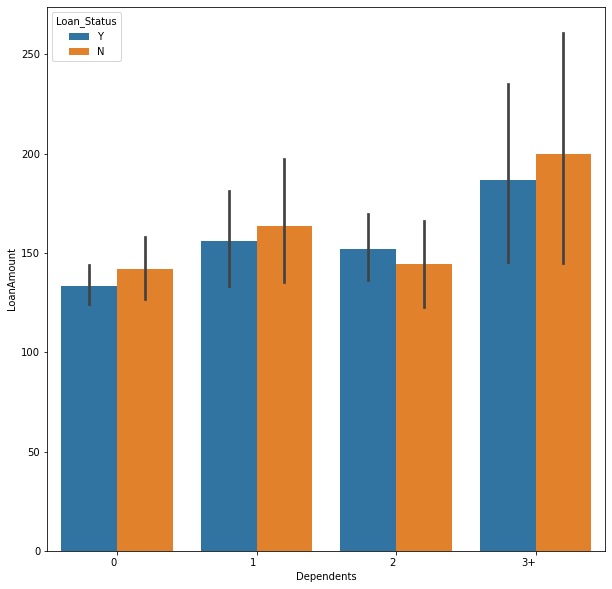

<function seaborn.categorical.countplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None, **kwargs)>

In [24]:
plt.subplots(figsize=(10,10))
chart =sns.barplot(x='Dependents', y='LoanAmount', hue='Loan_Status', data=dt)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0, horizontalalignment='right')
plt.show()
sns.countplot

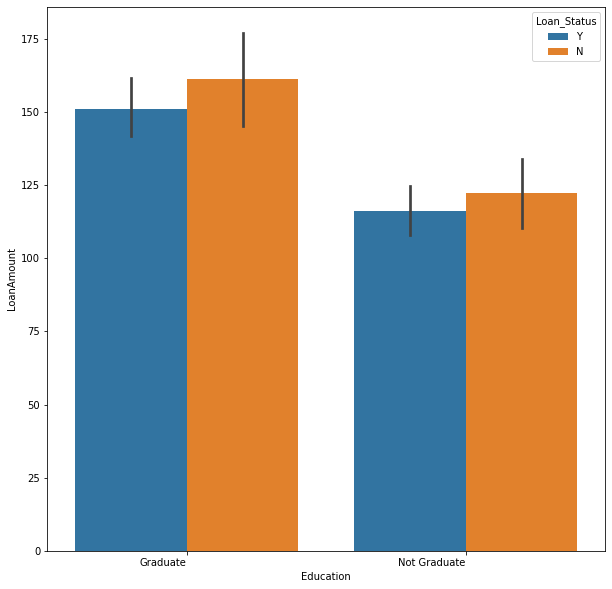

<function seaborn.categorical.countplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None, **kwargs)>

In [25]:
plt.subplots(figsize=(10,10))
chart =sns.barplot(x='Education', y='LoanAmount', hue='Loan_Status', data=dt)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0, horizontalalignment='right')
plt.show()
sns.countplot

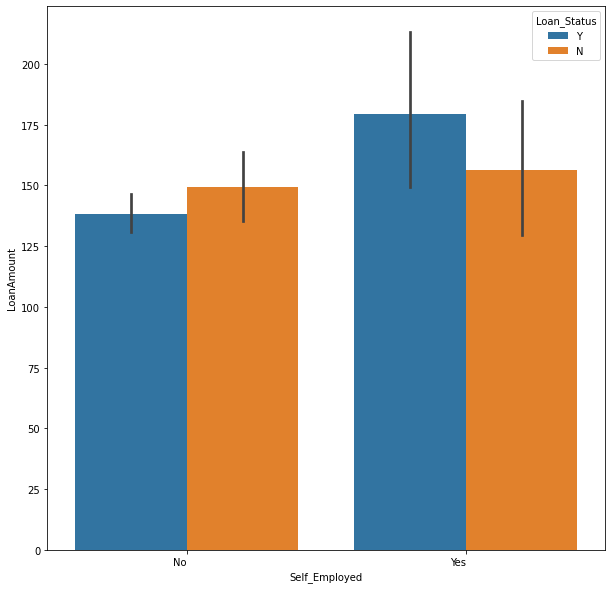

<function seaborn.categorical.countplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None, **kwargs)>

In [26]:
plt.subplots(figsize=(10,10))
chart =sns.barplot(x='Self_Employed', y='LoanAmount', hue='Loan_Status', data=dt)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0, horizontalalignment='right')
plt.show()
sns.countplot

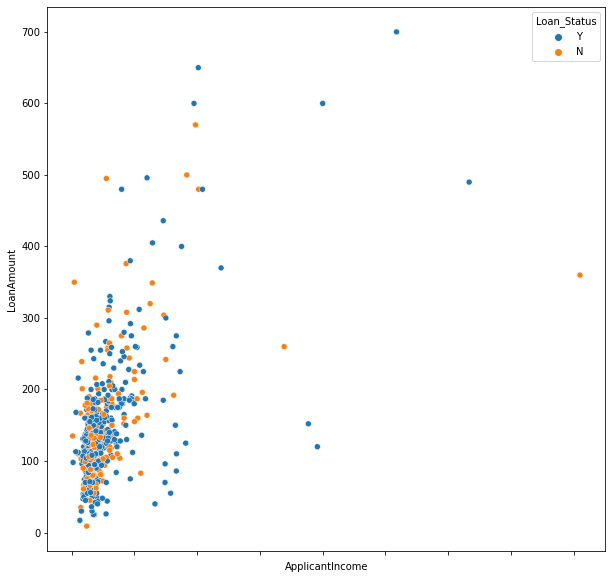

<function seaborn.categorical.countplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None, **kwargs)>

In [27]:
plt.subplots(figsize=(10,10))
chart =sns.scatterplot(x='ApplicantIncome', y='LoanAmount', hue='Loan_Status', data=dt)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0, horizontalalignment='right')
plt.show()
sns.countplot

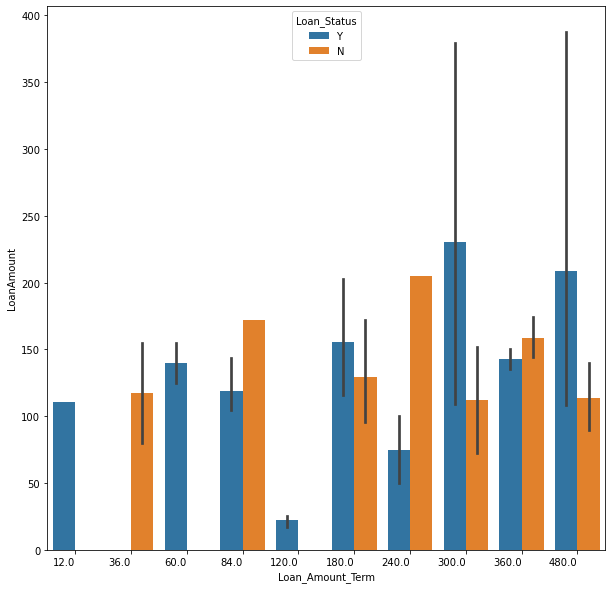

<function seaborn.categorical.countplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None, **kwargs)>

In [28]:
plt.subplots(figsize=(10,10))
chart =sns.barplot(x='Loan_Amount_Term', y='LoanAmount', hue='Loan_Status', data=dt)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0, horizontalalignment='right')
plt.show()
sns.countplot

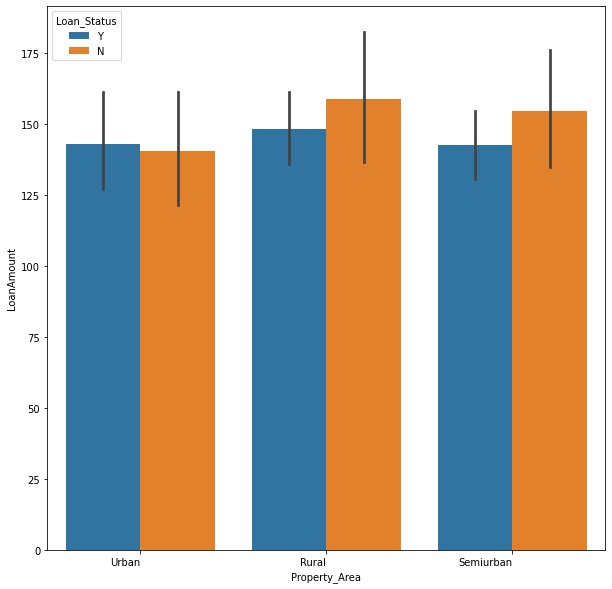

<function seaborn.categorical.countplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None, **kwargs)>

In [29]:
plt.subplots(figsize=(10,10))
chart =sns.barplot(x='Property_Area', y='LoanAmount', hue='Loan_Status', data=dt)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0, horizontalalignment='right')
plt.show()
sns.countplot

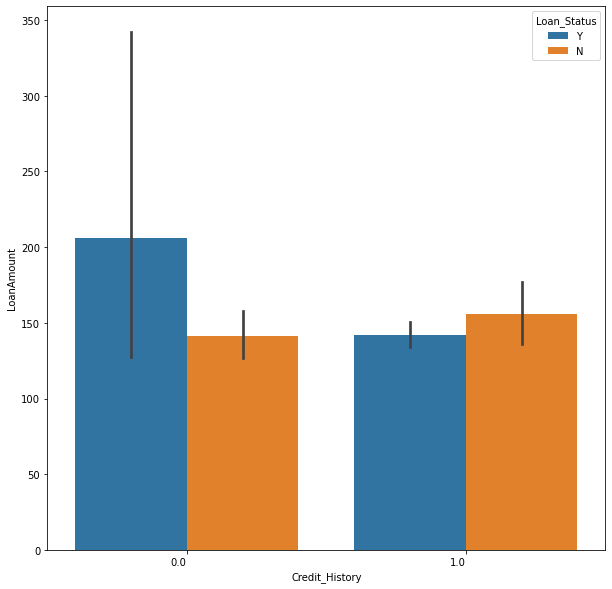

<function seaborn.categorical.countplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None, **kwargs)>

In [30]:
plt.subplots(figsize=(10,10))
chart =sns.barplot(x='Credit_History', y='LoanAmount', hue='Loan_Status', data=dt)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0, horizontalalignment='right')
plt.show()
sns.countplot

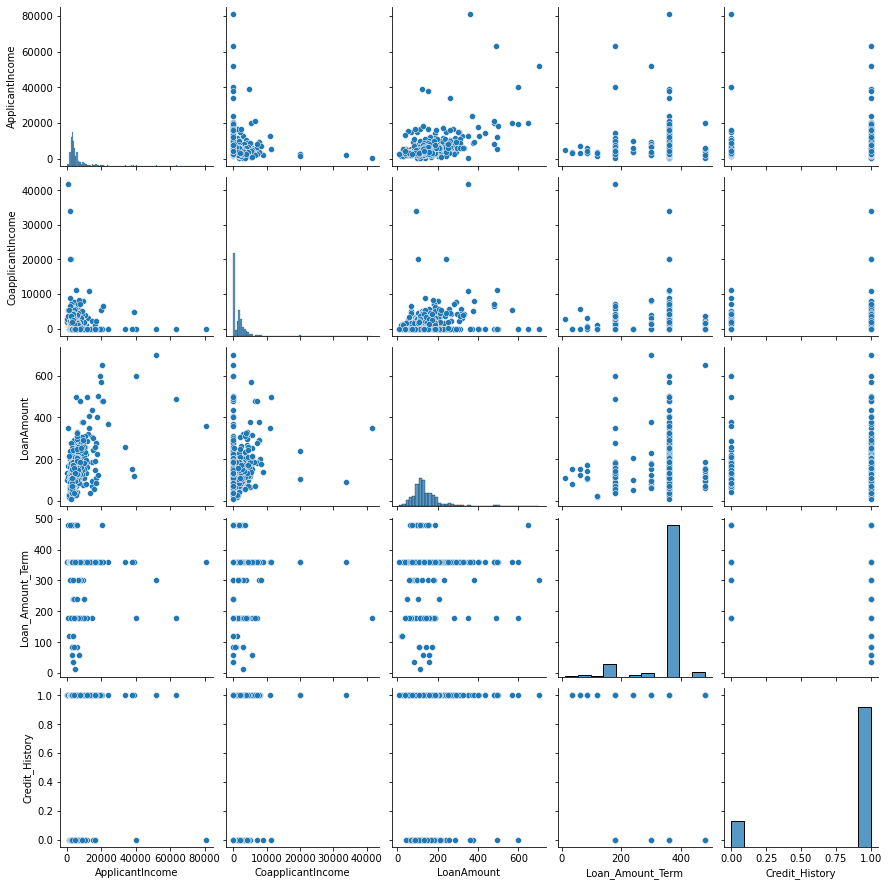

In [31]:
sns.pairplot(dt)

In [7]:
#Replacing the NAN values
dt.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
dt['Gender'].mode()[0]

'Male'

In [9]:
dt['Gender'].fillna(dt['Gender'].mode()[0],inplace=True)

In [10]:
dt['Married'].mode()[0]

'Yes'

In [11]:
dt['Married'].fillna(dt['Married'].mode()[0],inplace=True)

In [12]:
dt['Dependents'].mode()[0]

'0'

In [13]:
dt['Dependents'].fillna(dt['Dependents'].mode()[0],inplace=True)

In [14]:
dt['Self_Employed'].mode()[0]

'No'

In [15]:
dt['Self_Employed'].fillna(dt['Self_Employed'].mode()[0],inplace=True)

In [16]:
dt['LoanAmount'].median()

128.0

In [17]:
dt['LoanAmount'].mean()

146.41216216216216

In [18]:
dt['LoanAmount'].fillna(dt['LoanAmount'].mode()[0],inplace=True)

<AxesSubplot:ylabel='Density'>

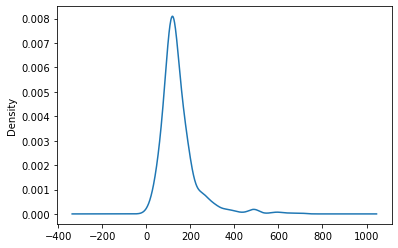

In [19]:
dt['LoanAmount'].plot(kind='kde')

In [20]:
dt['Loan_Amount_Term'].fillna(dt['Loan_Amount_Term'].mode()[0],inplace=True)

In [21]:
dt['Credit_History'].fillna(dt['Credit_History'].mode()[0],inplace=True)

In [22]:
#label encoder
from sklearn.preprocessing import LabelEncoder

In [23]:
# Assigning to a variable
le=LabelEncoder()

In [24]:
# Coverting all the catagorical variables to numerical in trianing dataset
dt['Gender']=le.fit_transform(dt['Gender'])
dt['Married']=le.fit_transform(dt['Married'])
dt['Dependents']=le.fit_transform(dt['Dependents'])
dt['Education']=le.fit_transform(dt['Education'])
dt['Self_Employed']=le.fit_transform(dt['Self_Employed'])
dt['Credit_History']=le.fit_transform(dt['Credit_History'])
dt['Loan_Status']=le.fit_transform(dt['Loan_Status'])
dt['Property_Area']=le.fit_transform(dt['Property_Area'])

In [25]:
dt

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,120.0,360.0,1,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.0,360.0,1,0,1
610,LP002979,1,1,3,0,0,4106,0.0,40.0,180.0,1,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.0,360.0,1,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.0,360.0,1,2,1


In [26]:
dt.drop('Loan_ID',axis=1, inplace=True)

In [28]:
#Upsmapling have to be performed to remove the biases
from imblearn.over_sampling import SMOTE

In [29]:
osmp=SMOTE(0.75)

In [30]:
# Assignment of X and y
X=dt.drop(['Loan_Status'], axis=1)
y=dt.Loan_Status

In [31]:
# Standardization of the data
scalar= StandardScaler()
X_scaled=scalar.fit_transform(X)

In [32]:
x_train,x_test,y_train, y_test=train_test_split(X_scaled,y)

In [33]:
X_train_ns,y_train_ns=osmp.fit_resample(x_train,y_train)

In [34]:
# Importing PCA components
from sklearn.decomposition import PCA

In [35]:
pca=PCA()
pca.fit_transform(X_train_ns)

array([[-1.94619872,  0.77193395, -1.26884616, ...,  0.53798448,
        -0.43178976, -0.23621366],
       [-2.31352278,  1.42275827, -0.03433917, ...,  1.04315686,
        -0.19878762,  0.07380541],
       [-1.61668386,  1.7672789 , -0.04808222, ...,  0.67801216,
         0.30202043,  1.57658717],
       ...,
       [-1.22229725,  0.77641039,  0.72014429, ..., -0.8948593 ,
         0.76718637, -0.00333528],
       [-0.18143658, -0.74080354, -0.81252999, ..., -0.73143681,
        -0.69211307,  0.17902617],
       [ 0.42544882, -0.63132954, -1.66487606, ...,  0.18492539,
        -0.45809662,  0.05111687]])

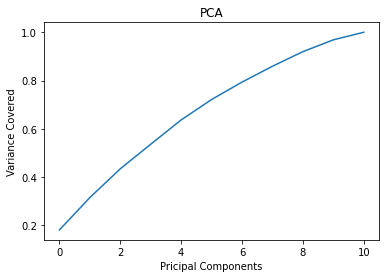

In [36]:
# Ploting Scree plot to check the best components
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Pricipal Components')
plt.ylabel('Variance Covered')
plt.title('PCA')
plt.show()

In [37]:
pca=PCA(n_components=10)
new_pcomp=pca.fit_transform(X_train_ns)
prin_comp=pd.DataFrame(new_pcomp, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])

In [38]:
prin_comp

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-1.946199,0.771934,-1.268846,-1.306101,1.312658,0.588173,1.299204,-1.054427,0.537984,-0.431790
1,-2.313523,1.422758,-0.034339,-0.320989,-0.217471,-0.017399,0.058236,-0.334989,1.043157,-0.198788
2,-1.616684,1.767279,-0.048082,-0.348936,-1.654643,-0.019553,0.456770,-0.856227,0.678012,0.302020
3,1.100263,-1.330688,-1.604615,1.234828,-1.072044,-0.681296,-1.289365,-0.789729,0.557706,0.764951
4,-1.638523,0.265686,0.434779,-0.371133,0.012326,-0.506395,-0.272660,0.794407,-0.271762,0.986747
...,...,...,...,...,...,...,...,...,...,...
539,-0.283789,-1.553587,-1.322218,1.621575,-0.293609,-0.065751,0.710024,-0.456542,-1.847865,-1.127390
540,-1.634455,0.205182,0.593917,-0.242862,-0.754012,-0.327847,0.407768,0.293793,-1.142908,0.706919
541,-1.222297,0.776410,0.720144,-0.062446,-0.866154,-0.591930,0.257429,0.558428,-0.894859,0.767186
542,-0.181437,-0.740804,-0.812530,2.000393,-0.849226,-0.778581,-0.689330,0.485268,-0.731437,-0.692113


In [39]:
# Importing machine learning libraries
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRFClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error,mean_absolute_error, r2_score

In [107]:
# Finding the random state 
maxAc=0
maxrs=0

for i in range(1,2000):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train, y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('accuracy of the model', acc,'random_state', i)
    
    if acc>maxAc:
        maxAc=acc
        maxrs=i
        print ('accuracy of the optimum model', acc,'random_state', i)

accuracy of the model 0.7431192660550459 random_state 1
accuracy of the optimum model 0.7431192660550459 random_state 1
accuracy of the model 0.7064220183486238 random_state 2
accuracy of the model 0.7064220183486238 random_state 3
accuracy of the model 0.7247706422018348 random_state 4
accuracy of the model 0.6605504587155964 random_state 5
accuracy of the model 0.7981651376146789 random_state 6
accuracy of the optimum model 0.7981651376146789 random_state 6
accuracy of the model 0.7155963302752294 random_state 7
accuracy of the model 0.7614678899082569 random_state 8
accuracy of the model 0.6972477064220184 random_state 9
accuracy of the model 0.7431192660550459 random_state 10
accuracy of the model 0.6972477064220184 random_state 11
accuracy of the model 0.7431192660550459 random_state 12
accuracy of the model 0.6880733944954128 random_state 13
accuracy of the model 0.6880733944954128 random_state 14
accuracy of the model 0.7431192660550459 random_state 15
accuracy of the model 0.66

In [108]:
print ('Optimum accuracy is obtaned in', maxAc, 'in random state', maxrs)

Optimum accuracy is obtaned in 0.8623853211009175 in random state 494


In [95]:
# Finding the random state 
maxAc=0
maxrs=0

for i in range(1,500):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=i)
    kn=KNeighborsClassifier()
    kn.fit(x_train, y_train)
    pred=kn.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('accuracy of the model', acc,'random_state', i)
    
    if acc>maxAc:
        maxAc=acc
        maxrs=i
        print ('accuracy of the optimum model', acc,'random_state', i)

accuracy of the model 0.6788990825688074 random_state 1
accuracy of the optimum model 0.6788990825688074 random_state 1
accuracy of the model 0.7522935779816514 random_state 2
accuracy of the optimum model 0.7522935779816514 random_state 2
accuracy of the model 0.6880733944954128 random_state 3
accuracy of the model 0.6788990825688074 random_state 4
accuracy of the model 0.6238532110091743 random_state 5
accuracy of the model 0.7339449541284404 random_state 6
accuracy of the model 0.7064220183486238 random_state 7
accuracy of the model 0.7889908256880734 random_state 8
accuracy of the optimum model 0.7889908256880734 random_state 8
accuracy of the model 0.6788990825688074 random_state 9
accuracy of the model 0.6422018348623854 random_state 10
accuracy of the model 0.7614678899082569 random_state 11
accuracy of the model 0.6880733944954128 random_state 12
accuracy of the model 0.7064220183486238 random_state 13
accuracy of the model 0.6055045871559633 random_state 14
accuracy of the mod

In [96]:
print ('Optimum accuracy is obtaned in', maxAc, 'in random state', maxrs)

Optimum accuracy is obtaned in 0.8165137614678899 in random state 224


In [97]:
# Finding the random state 
maxAc=0
maxrs=0

for i in range(1,1000):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=i)
    de=DecisionTreeClassifier()
    de.fit(x_train, y_train)
    pred=de.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('accuracy of the model', acc,'random_state', i)
    
    if acc>maxAc:
        maxAc=acc
        maxrs=i
        print ('accuracy of the optimum model', acc,'random_state', i)

accuracy of the model 0.6330275229357798 random_state 1
accuracy of the optimum model 0.6330275229357798 random_state 1
accuracy of the model 0.7339449541284404 random_state 2
accuracy of the optimum model 0.7339449541284404 random_state 2
accuracy of the model 0.7064220183486238 random_state 3
accuracy of the model 0.6972477064220184 random_state 4
accuracy of the model 0.7339449541284404 random_state 5
accuracy of the model 0.7522935779816514 random_state 6
accuracy of the optimum model 0.7522935779816514 random_state 6
accuracy of the model 0.7339449541284404 random_state 7
accuracy of the model 0.6880733944954128 random_state 8
accuracy of the model 0.6605504587155964 random_state 9
accuracy of the model 0.6880733944954128 random_state 10
accuracy of the model 0.6697247706422018 random_state 11
accuracy of the model 0.7155963302752294 random_state 12
accuracy of the model 0.7247706422018348 random_state 13
accuracy of the model 0.6788990825688074 random_state 14
accuracy of the mod

In [98]:
print ('Optimum accuracy is obtaned in', maxAc, 'in random state', maxrs)

Optimum accuracy is obtaned in 0.8256880733944955 in random state 939


In [99]:
# Finding the random state 
maxAc=0
maxrs=0

for i in range(1,1000):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=i)
    xe=XGBRFClassifier()
    xe.fit(x_train, y_train)
    pred=xe.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('accuracy of the model', acc,'random_state', i)
    
    if acc>maxAc:
        maxAc=acc
        maxrs=i
        print ('accuracy of the optimum model', acc,'random_state', i)

[19:51:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy of the model 0.7155963302752294 random_state 1
accuracy of the optimum model 0.7155963302752294 random_state 1
[19:51:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy of the model 0.7247706422018348 random_state 2
accuracy of the optimum model 0.7247706422018348 random_state 2
[19:51:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default

In [100]:
print ('Optimum accuracy is obtaned in', maxAc, 'in random state', maxrs)

Optimum accuracy is obtaned in 0.8165137614678899 in random state 494


In [101]:
# Finding the random state 
maxAc=0
maxrs=0

for i in range(1,800):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=i)
    ad=AdaBoostClassifier()
    ad.fit(x_train, y_train)
    pred=ad.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('accuracy of the model', acc,'random_state', i)
    
    if acc>maxAc:
        maxAc=acc
        maxrs=i
        print ('accuracy of the optimum model', acc,'random_state', i)

accuracy of the model 0.6697247706422018 random_state 1
accuracy of the optimum model 0.6697247706422018 random_state 1
accuracy of the model 0.6422018348623854 random_state 2
accuracy of the model 0.7247706422018348 random_state 3
accuracy of the optimum model 0.7247706422018348 random_state 3
accuracy of the model 0.6605504587155964 random_state 4
accuracy of the model 0.6880733944954128 random_state 5
accuracy of the model 0.7339449541284404 random_state 6
accuracy of the optimum model 0.7339449541284404 random_state 6
accuracy of the model 0.6880733944954128 random_state 7
accuracy of the model 0.7247706422018348 random_state 8
accuracy of the model 0.6513761467889908 random_state 9
accuracy of the model 0.6605504587155964 random_state 10
accuracy of the model 0.6330275229357798 random_state 11
accuracy of the model 0.6697247706422018 random_state 12
accuracy of the model 0.6605504587155964 random_state 13
accuracy of the model 0.6513761467889908 random_state 14
accuracy of the mod

In [102]:
print ('Optimum accuracy is obtaned in', maxAc, 'in random state', maxrs)

Optimum accuracy is obtaned in 0.8165137614678899 in random state 711


In [103]:
# Finding the random state 
maxAc=0
maxrs=0

for i in range(1,800):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=i)
    gc=GradientBoostingClassifier()
    gc.fit(x_train, y_train)
    pred=gc.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('accuracy of the model', acc,'random_state', i)
    
    if acc>maxAc:
        maxAc=acc
        maxrs=i
        print ('accuracy of the optimum model', acc,'random_state', i)

accuracy of the model 0.7064220183486238 random_state 1
accuracy of the optimum model 0.7064220183486238 random_state 1
accuracy of the model 0.7431192660550459 random_state 2
accuracy of the optimum model 0.7431192660550459 random_state 2
accuracy of the model 0.6788990825688074 random_state 3
accuracy of the model 0.7431192660550459 random_state 4
accuracy of the model 0.7155963302752294 random_state 5
accuracy of the model 0.8073394495412844 random_state 6
accuracy of the optimum model 0.8073394495412844 random_state 6
accuracy of the model 0.6880733944954128 random_state 7
accuracy of the model 0.7522935779816514 random_state 8
accuracy of the model 0.7064220183486238 random_state 9
accuracy of the model 0.6788990825688074 random_state 10
accuracy of the model 0.7339449541284404 random_state 11
accuracy of the model 0.7247706422018348 random_state 12
accuracy of the model 0.6605504587155964 random_state 13
accuracy of the model 0.6788990825688074 random_state 14
accuracy of the mod

In [104]:
print ('Optimum accuracy is obtaned in', maxAc, 'in random state', maxrs)

Optimum accuracy is obtaned in 0.8256880733944955 in random state 204


In [105]:
# Finding the random state 
maxAc=0
maxrs=0

for i in range(1,800):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=i)
    sc=SVC()
    sc.fit(x_train, y_train)
    pred=sc.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('accuracy of the model', acc,'random_state', i)
    
    if acc>maxAc:
        maxAc=acc
        maxrs=i
        print ('accuracy of the optimum model', acc,'random_state', i)

accuracy of the model 0.7431192660550459 random_state 1
accuracy of the optimum model 0.7431192660550459 random_state 1
accuracy of the model 0.6697247706422018 random_state 2
accuracy of the model 0.7522935779816514 random_state 3
accuracy of the optimum model 0.7522935779816514 random_state 3
accuracy of the model 0.7064220183486238 random_state 4
accuracy of the model 0.6605504587155964 random_state 5
accuracy of the model 0.7889908256880734 random_state 6
accuracy of the optimum model 0.7889908256880734 random_state 6
accuracy of the model 0.7155963302752294 random_state 7
accuracy of the model 0.7614678899082569 random_state 8
accuracy of the model 0.7064220183486238 random_state 9
accuracy of the model 0.7431192660550459 random_state 10
accuracy of the model 0.7064220183486238 random_state 11
accuracy of the model 0.7247706422018348 random_state 12
accuracy of the model 0.6880733944954128 random_state 13
accuracy of the model 0.6697247706422018 random_state 14
accuracy of the mod

In [106]:
print ('Optimum accuracy is obtaned in', maxAc, 'in random state', maxrs)

Optimum accuracy is obtaned in 0.8440366972477065 in random state 494


In [40]:
x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=494)
lr=LogisticRegression()
lr.fit(x_train, y_train)
pred1=lr.predict(x_test)
acc=accuracy_score(y_test,pred1)
print('accuracy of the model', acc,'random_state', 494)
print(classification_report(y_test,pred1))
print(classification_report(y_test,pred1))

accuracy of the model 0.7614678899082569 random_state 494
              precision    recall  f1-score   support

           0       0.90      0.43      0.58        42
           1       0.73      0.97      0.83        67

    accuracy                           0.76       109
   macro avg       0.82      0.70      0.71       109
weighted avg       0.80      0.76      0.74       109

              precision    recall  f1-score   support

           0       0.90      0.43      0.58        42
           1       0.73      0.97      0.83        67

    accuracy                           0.76       109
   macro avg       0.82      0.70      0.71       109
weighted avg       0.80      0.76      0.74       109



In [41]:
x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=224)
kn=KNeighborsClassifier()
kn.fit(x_train, y_train)
pred2=kn.predict(x_test)
acc=accuracy_score(y_test,pred2)
print('accuracy of the model', acc,'random_state', 224)
print(classification_report(y_test,pred2))

accuracy of the model 0.7155963302752294 random_state 224
              precision    recall  f1-score   support

           0       0.55      0.60      0.58        35
           1       0.80      0.77      0.79        74

    accuracy                           0.72       109
   macro avg       0.68      0.69      0.68       109
weighted avg       0.72      0.72      0.72       109



In [42]:
x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=939)
de=DecisionTreeClassifier()
de.fit(x_train, y_train)
pred3=de.predict(x_test)
acc=accuracy_score(y_test,pred3)
print('accuracy of the model', acc,'random_state', 939)
print(classification_report(y_test,pred3))

accuracy of the model 0.7247706422018348 random_state 939
              precision    recall  f1-score   support

           0       0.68      0.73      0.71        49
           1       0.77      0.72      0.74        60

    accuracy                           0.72       109
   macro avg       0.72      0.73      0.72       109
weighted avg       0.73      0.72      0.73       109



In [43]:
x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=494)
xe=XGBRFClassifier()
xe.fit(x_train, y_train)
pred4=xe.predict(x_test)
acc=accuracy_score(y_test,pred4)
print('accuracy of the model', acc,'random_state', 494)
print(classification_report(y_test,pred4))

[14:11:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy of the model 0.7889908256880734 random_state 494
              precision    recall  f1-score   support

           0       0.77      0.64      0.70        42
           1       0.80      0.88      0.84        67

    accuracy                           0.79       109
   macro avg       0.78      0.76      0.77       109
weighted avg       0.79      0.79      0.78       109



In [44]:
x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=711)
ad=AdaBoostClassifier()
ad.fit(x_train, y_train)
pred5=ad.predict(x_test)
acc=accuracy_score(y_test,pred5)
print('accuracy of the model', acc,'random_state', 711)
print(classification_report(y_test,pred5))

accuracy of the model 0.7339449541284404 random_state 711
              precision    recall  f1-score   support

           0       0.67      0.68      0.67        44
           1       0.78      0.77      0.78        65

    accuracy                           0.73       109
   macro avg       0.72      0.73      0.72       109
weighted avg       0.73      0.73      0.73       109



In [45]:
x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=494)
sc=SVC()
sc.fit(x_train, y_train)
pred6=sc.predict(x_test)
acc=accuracy_score(y_test,pred6)
print('accuracy of the model', acc,'random_state', 494)
print(classification_report(y_test,pred6))

accuracy of the model 0.7706422018348624 random_state 494
              precision    recall  f1-score   support

           0       0.84      0.50      0.63        42
           1       0.75      0.94      0.83        67

    accuracy                           0.77       109
   macro avg       0.79      0.72      0.73       109
weighted avg       0.78      0.77      0.75       109



In [117]:
#Ploting ROC and AUC curves
from sklearn.metrics import roc_curve,auc
fpr1,tpr1,thresholds=roc_curve(y_test,pred1)
roc_auc1=auc(fpr1,tpr1)
fpr2,tpr2,thresholds=roc_curve(y_test,pred2)
roc_auc2=auc(fpr2,tpr2)
fpr3,tpr3,thresholds=roc_curve(y_test,pred3)
roc_auc3=auc(fpr3,tpr3)
fpr4,tpr4,thresholds=roc_curve(y_test,pred4)
roc_auc4=auc(fpr4,tpr4)
fpr5,tpr5,thresholds=roc_curve(y_test,pred5)
roc_auc5=auc(fpr5,tpr5)
fpr6,tpr6,thresholds=roc_curve(y_test,pred6)
roc_auc6=auc(fpr6,tpr6)

In [118]:
print(roc_auc1,roc_auc2,roc_auc3,roc_auc4,roc_auc5,roc_auc6)

0.8007722007722008 0.41312741312741313 0.4552123552123552 0.7820463320463321 0.5295366795366796 0.7872586872586873


In [134]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV, LassoCV

In [155]:
lasscv=LassoCV(alphas=None, max_iter=1000,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(normalize=True)

In [156]:
alpha=lasscv.alpha_

In [157]:
alpha

0.0011393027147754856

In [148]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.0011393027147754856)

In [149]:
lasso_reg.score(x_test,y_test)

0.35694774982570376

In [150]:
ridgecv=RidgeCV(alphas=np.arange(0.0001,0.1,0.01), normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.0001, 0.0101, 0.0201, 0.0301, 0.0401, 0.0501, 0.0601, 0.0701,
       0.0801, 0.0901]),
        normalize=True)

In [151]:
ridgecv.alpha_

0.0901

In [152]:
rm= Ridge(alpha=ridgecv.alpha_)

In [153]:
rm.fit(x_train,y_train)

Ridge(alpha=0.0901)

In [154]:
rm.score(x_test,y_test)

0.3581139009642581

In [180]:
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
params={'C': [0.1, 1, 10, 100, 1000],
              'gamma': [3, 2,1, 0.1, 0.01],
              'kernel': ['rbf']}

In [181]:
from sklearn.model_selection import GridSearchCV
g=GridSearchCV(SVC(),param_grid=params)
g.fit(x_train,y_train)
print('The best parameters are ', g.best_params_)

The best parameters are  {'C': 10, 'gamma': 1, 'kernel': 'rbf'}


In [179]:
x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=494)
sc=SVC(C=10, gamma=1, kernel='rbf')
sc.fit(x_train, y_train)
pred=sc.predict(x_test)
acc=accuracy_score(y_test,pred)
acc

0.8440366972477065

In [ ]:
import pickle
filename = 'lo'
outfile = open(filename,'wb')
pickle.dump(lo_dict,outfile)
outfile.close()

# Conclusion
The loan application status data is analyzed and different techniques like encoding and PCA was used and the model was built. The model is trained in SVC with 84.40366972477065 and logistic regression.